In [62]:
import pandas as pd

# Create an empty Pandas DataFrame
dataset = pd.DataFrame(columns=['title', 'url', 'source', 'political_bias'])

# Print the empty DataFrame
print(dataset)

# Save the empty DataFrame to a CSV file
dataset.to_csv('dataset.csv', index=False)


Empty DataFrame
Columns: [title, url, source, political_bias]
Index: []


In [8]:
import mechanicalsoup

url = "https://www.lanacion.com.ar/politica/"  # Replace with the actual URL of the website

browser = mechanicalsoup.StatefulBrowser()

# Open the URL
browser.open(url)

# Find the div with the specified class (e.g., "row-gap-tablet-3")
div_class = "row-gap-tablet-3"
div = browser.page.find("div", class_=div_class)

# Extract URLs from anchor tags within the div
urls = set()  # Use a set to store unique URLs

for a in div.find_all("a"):
    href = a.get("href")
    if href and href not in urls:
        urls.add(href)

# Limit the extraction to 5 URLs
limited_urls = list(urls)[:15]

# Print the extracted URLs
for index, url in enumerate(limited_urls, start=1):
    print(f"URL {index}: lanacion.com.ar{url}")

browser.close()


URL 1: lanacion.com.ar/politica/el-presidente-milei-ataco-por-redes-a-la-periodista-silvia-mercado-y-la-acuso-de-mentirosa-serial-nid09012024/
URL 2: lanacion.com.ar/politica/luis-petri-impulsa-la-participacion-de-las-fuerzas-armadas-en-el-combate-al-narcotrafico-y-al-nid09012024/
URL 3: lanacion.com.ar/politica/atentados-y-mafia-narco-identifican-al-autor-de-las-amenazas-contra-pullaro-nid09012024/
URL 4: lanacion.com.ar/politica/entidades-periodisticas-desaprobaron-la-actitud-de-milei-luego-del-ataque-a-una-periodista-nid09012024/
URL 5: lanacion.com.ar/politica/juristas-y-abogados-mandaron-una-carta-abierta-al-congreso-en-contra-de-la-reforma-expres-del-codigo-nid09012024/
URL 6: lanacion.com.ar/politica/senado-villarruel-negocia-los-ultimos-votos-para-sancionar-la-boleta-unica-nid09012024/


In [38]:
import mechanicalsoup

# List of URLs to scrape
urls = ["https://www.lanacion.com.ar/espectaculos/","https://www.lanacion.com.ar/sociedad/",
        "https://www.lanacion.com.ar/el-mundo/","https://www.lanacion.com.ar/lifestyle/",
        "https://www.lanacion.com.ar/politica/", "https://www.lanacion.com.ar/opinion/"
        ,"https://www.lanacion.com.ar/economia/"]

# Initialize an empty list to store all data
all_data = []

# Set the maximum number of pages you want to scrape
max_pages = 15

# Iterate over each URL
for url in urls:
    browser = mechanicalsoup.StatefulBrowser()

    # Open the URL
    browser.open(url)

    # Find the div with the specified class (e.g., "row-gap-tablet-3")
    div_class = "row-gap-tablet-3"
    div = browser.page.find("div", class_=div_class)

    # Extract URLs and titles from anchor tags within the div
    data = []
    for a in div.find_all("a"):
        href = a.get("href")
        title = a.get_text(strip=True)
        if href:
            data.append({"title": title, "url": href})

    # Limit the extraction to 5 URLs and titles
    limited_data = data[:650]

    # Append the limited data to the overall data list
    all_data.extend(limited_data)

    browser.close()

# Print all the extracted URLs and titles
for index, item in enumerate(all_data, start=1):
    print(f"Entry {index}: Title: {item['title']}, URL: www.lanacion.com.ar{item['url']}")



Entry 1: Title: , URL: www.lanacion.com.ar/espectaculos/a-zaira-nara-le-preguntaron-si-planea-casarse-con-facundo-pieres-y-su-respuesta-sorprendio-a-todos-nid10012024/
Entry 2: Title: Se sinceró.A Zaira Nara le preguntaron si planea casarse con Facundo Pieres y su respuesta sorprendió a todos, URL: www.lanacion.com.ar/espectaculos/a-zaira-nara-le-preguntaron-si-planea-casarse-con-facundo-pieres-y-su-respuesta-sorprendio-a-todos-nid10012024/
Entry 3: Title: Celebridades, URL: www.lanacion.com.ar/tema/celebridades-tid68242/
Entry 4: Title: , URL: www.lanacion.com.ar/espectaculos/sabrina-rojas-apunto-furiosa-contra-luciano-castro-trabaja-el-celebro-un-poquito-tambien-nid09012024/
Entry 5: Title: Filosa.Sabrina Rojas apuntó furiosa contra Luciano Castro: “Trabajá el cerebro un poquito también”, URL: www.lanacion.com.ar/espectaculos/sabrina-rojas-apunto-furiosa-contra-luciano-castro-trabaja-el-celebro-un-poquito-tambien-nid09012024/
Entry 6: Title: Celebridades, URL: www.lanacion.com.ar/tem

In [63]:
import mechanicalsoup
import pandas as pd

# List of URLs to scrape
urls = [
    "https://www.lanacion.com.ar/espectaculos/",
    "https://www.lanacion.com.ar/sociedad/",
    "https://www.lanacion.com.ar/el-mundo/",
    "https://www.lanacion.com.ar/lifestyle/",
    "https://www.lanacion.com.ar/politica/",
    "https://www.lanacion.com.ar/opinion/",
    "https://www.lanacion.com.ar/economia/"
]

# Initialize the DataFrame with columns
columns = ['title', 'url', 'source', 'political_bias']
sources = pd.DataFrame(columns=columns)

# Set the political bias for La Nacion
la_nacion_bias = 'conservative'

# Iterate over each URL
for url in urls:
    browser = mechanicalsoup.StatefulBrowser()

    # Open the URL
    browser.open(url)

    # Find the div with the specified class (e.g., "row-gap-tablet-3")
    div_class = "row-gap-tablet-3"
    div = browser.page.find("div", class_=div_class)

    # Extract URLs and titles from anchor tags within the div
    data = []
    for a in div.find_all("a"):
        href = a.get("href")
        title = a.get_text(strip=True)
        if href:
            data.append({"title": title, "url": "https://www.lanacion.com.ar"+href, "source": "lanacion", "political_bias": la_nacion_bias})

    # Limit the extraction to 5 URLs and titles
    limited_data = data[:650]

    # Append the limited data to the overall data list
    sources = sources.append(limited_data, ignore_index=True)

    browser.close()

# Print the DataFrame
print(sources)

# Save the DataFrame to a CSV file
sources.to_csv('dataset.csv', index=False)


C:\Users\DELL\AppData\Local\Temp\ipykernel_24656\3886522693.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sources = sources.append(limited_data, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_24656\3886522693.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sources = sources.append(limited_data, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_24656\3886522693.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sources = sources.append(limited_data, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_24656\3886522693.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sources = sources.

                                                 title  \
0                                                        
1    Los 8 escalones.Ganó los millones y dejó en sh...   
2                                      Programas de TV   
3                                                        
4    No se esconden.El primer video de Lali Espósit...   
..                                                 ...   
428                                                      
429  Decisión.La SEC aprobó los fondos de Bitcoin, ...   
430                                                      
431  Tarifas.Colectivos a $270 y trenes a $160, el ...   
432                                    Por Diego Cabot   

                                                   url    source  \
0    https://www.lanacion.com.ar/espectaculos/gano-...  lanacion   
1    https://www.lanacion.com.ar/espectaculos/gano-...  lanacion   
2    https://www.lanacion.com.ar/tema/programas-de-...  lanacion   
3    https://www.lanacion.com.a

C:\Users\DELL\AppData\Local\Temp\ipykernel_24656\3886522693.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sources = sources.append(limited_data, ignore_index=True)


In [64]:
import mechanicalsoup
import pandas as pd

# List of URLs to scrape
urls = [
    "https://www.clarin.com/politica",
    "https://www.clarin.com/sociedad",
    "https://www.clarin.com/opinion",
    "https://www.clarin.com/economia",
    "https://www.clarin.com/mundo"
]

# Initialize the DataFrame with columns
columns = ['title', 'url', 'source', 'political_bias']
sources = pd.DataFrame(columns=columns)

# Set the political bias for Clarin
clarin_bias = 'conservative'

# Load the existing DataFrame from the CSV file if it exists
try:
    existing_sources = pd.read_csv('dataset.csv')
    sources = pd.concat([sources, existing_sources], ignore_index=True)
except FileNotFoundError:
    pass

# Iterate over each URL
for url in urls:
    browser = mechanicalsoup.StatefulBrowser()

    # Open the URL
    browser.open(url)

    # Find the ul with the specified class ("div1")
    ul_class = "div1"
    ul = browser.page.find("ul", class_=ul_class)

    # Check if the ul is found before extracting data
    if ul:
        # Extract URLs and titles from anchor tags within the ul
        data = []
        for a in ul.find_all("a", class_="sc-198398ff-0 eQzoJk"):
            href = a.get("href")
            title = a.get("aria-label")
            if href and title:
                data.append({"title": title, "url": "https://www.clarin.com" + href, "source": "clarin", "political_bias": clarin_bias})

        # Append the data to the overall data list
        sources = pd.concat([sources, pd.DataFrame(data)], ignore_index=True)
    else:
        print(f"No ul with class '{ul_class}' found on the page.")

    browser.close()

# Print the DataFrame
print(sources)

# Save the DataFrame to a CSV file
sources.to_csv('dataset.csv', index=False)


No ul with class 'div1' found on the page.
                                                 title  \
0                                                  NaN   
1    Los 8 escalones.Ganó los millones y dejó en sh...   
2                                      Programas de TV   
3                                                  NaN   
4    No se esconden.El primer video de Lali Espósit...   
..                                                 ...   
468  Tornados, inundaciones, nieve y destrucción: l...   
469  ¿Por qué estalla la violencia en Ecuador? Las ...   
470  Crisis en Ecuador, EN VIVO: "Estamos en un est...   
471  López Obrador le dijo "señor vestido de mujer"...   
472  Ecuador saca a los militares a la calles para ...   

                                                   url    source  \
0    https://www.lanacion.com.ar/espectaculos/gano-...  lanacion   
1    https://www.lanacion.com.ar/espectaculos/gano-...  lanacion   
2    https://www.lanacion.com.ar/tema/programas-de-...  

In [65]:
import mechanicalsoup
import pandas as pd

# List of URLs to scrape for El Destape
eldestape_urls = [
    "https://www.eldestapeweb.com/seccion/politica",
    "https://www.eldestapeweb.com/seccion/economia",
    "https://www.eldestapeweb.com/seccion/sociedad",
    "https://www.eldestapeweb.com/opinion/america-latina-y-el-caribe/america-latina-y-el-caribe-necesidad-y-urgencia-de-integracion-estrategica-y-unidad-continental--20241423440",
    "https://www.eldestapeweb.com/seccion/investigaciones",
    "https://www.eldestapeweb.com/seccion/internacionales"
]

# Initialize the DataFrame with columns
columns = ['title', 'url', 'political_bias', 'source']
eldestape_bias = 'progressive'
eldestape_source = 'eldestape'

# Load the existing DataFrame from the CSV file if it exists
try:
    dataset = pd.read_csv('dataset.csv')
except FileNotFoundError:
    # If the file doesn't exist, create an empty DataFrame
    dataset = pd.DataFrame(columns=columns)

# Initialize an empty list to store all data
all_data = []

# Set the maximum number of pages you want to scrape
max_pages = 5

# Function to scrape data for a given URL and bias
def scrape_data(url, bias, source):
    browser = mechanicalsoup.StatefulBrowser()

    # Open the URL
    browser.open(url)

    # Find the div with the specified class ("contenedor notas_seccion_ grid")
    div_class = "contenedor notas_seccion_ grid"
    main_div = browser.page.find("div", class_=div_class)

    # Check if the div is found before extracting data
    if main_div:
        # Extract titles and URLs from each article
        data = []
        for article_div in main_div.find_all("article", class_="nota_gen"):
            title = article_div.get_text(strip=True)
            href = article_div.find("a").get("href") if article_div.find("a") else None

            if title and href:
                data.append({"title": title, "url": "https://www.eldestapeweb.com" + href, "political_bias": eldestape_bias, "source": eldestape_source})

        # Append the data to the overall data list
        all_data.extend(data)
    else:
        print(f"No div with class '{div_class}' found on the page.")

    browser.close()

# Iterate over each URL
for url in eldestape_urls:
    scrape_data(url, eldestape_bias, eldestape_source)

# Append the new data to the existing DataFrame
dataset = pd.concat([dataset, pd.DataFrame(all_data)], ignore_index=True)

# Print the DataFrame
print(dataset)

# Save the DataFrame to a CSV file
dataset.to_csv('dataset.csv', index=False)



No div with class 'contenedor notas_seccion_ grid' found on the page.
                                                 title  \
0                                                  NaN   
1    Los 8 escalones.Ganó los millones y dejó en sh...   
2                                      Programas de TV   
3                                                  NaN   
4    No se esconden.El primer video de Lali Espósit...   
..                                                 ...   
523  EcuadorQuién es Daniel Noboa, el presidente qu...   
524  EcuadorYa son 10 los muertos por la violencia ...   
525  EcuadorEncapuchados y armados tomaron un canal...   
526  EcuadorCrece la crisis: estado de excepción, p...   
527  Bruno Le MaireFrancia: con críticas de todos l...   

                                                   url     source  \
0    https://www.lanacion.com.ar/espectaculos/gano-...   lanacion   
1    https://www.lanacion.com.ar/espectaculos/gano-...   lanacion   
2    https://www.lanacion.

In [66]:
import mechanicalsoup
import pandas as pd

# List of URLs to scrape
urls = [
    "https://derechadiario.com.ar/category/economia",
    "https://derechadiario.com.ar/category/argentina",
    "https://derechadiario.com.ar/category/norteamerica/norteamerica_estados-unidos",
    "https://derechadiario.com.ar/category/latinoamerica/latinoamerica_brasil",
    "https://derechadiario.com.ar/category/china",
    "https://derechadiario.com.ar/category/europa",
    "https://derechadiario.com.ar/category/latinoamerica",
    "https://derechadiario.com.ar/category/opinion"
]

# Initialize the DataFrame with columns
columns = ['title', 'url', 'political_bias', 'source']
right_wing_bias = 'right_wing'
laderechadiario_source = 'laderechadiario'

# Load the existing DataFrame from the CSV file if it exists
try:
    dataset = pd.read_csv('dataset.csv')
except FileNotFoundError:
    # If the file doesn't exist, create an empty DataFrame
    dataset = pd.DataFrame(columns=columns)

# Initialize an empty list to store all data
all_data = []

# Set the maximum number of pages you want to scrape
max_pages = 3

# Function to scrape data for a given URL and bias
def scrape_data(url, bias, source):
    browser = mechanicalsoup.StatefulBrowser()

    # Open the URL
    browser.open(url)

    # Extract links from "div class='mvp-widget-feat2-right left relative'"
    feat2_div = browser.page.find("div", class_="mvp-widget-feat2-right left relative")
    if feat2_div:
        feat2_links = [a.get("href") for a in feat2_div.find_all("a")]
        all_data.extend([{"url": link, "political_bias": bias, "source": source} for link in feat2_links])

    # Extract links and titles from "ul class='mvp-blog-story-list left relative infinite-content'"
    story_list_ul = browser.page.find("ul", class_="mvp-blog-story-list left relative infinite-content")
    if story_list_ul:
        story_data = []
        for li in story_list_ul.find_all("li"):
            link = li.find("a").get("href")
            title = li.find("h2").get_text(strip=True) if li.find("h2") else None
            if link and title:
                story_data.append({"url": link, "title": title, "political_bias": bias, "source": source})
        all_data.extend(story_data)

    browser.close()

# Iterate over each URL
for url in urls:
    scrape_data(url, right_wing_bias, laderechadiario_source)

# Append the new data to the existing DataFrame
dataset = pd.concat([dataset, pd.DataFrame(all_data)], ignore_index=True)

# Print the DataFrame
print(dataset)

# Save the DataFrame to a CSV file
dataset.to_csv('dataset.csv', index=False)




                                                 title  \
0                                                  NaN   
1    Los 8 escalones.Ganó los millones y dejó en sh...   
2                                      Programas de TV   
3                                                  NaN   
4    No se esconden.El primer video de Lali Espósit...   
..                                                 ...   
595  El ridículo argumento de Rossi: La inseguridad...   
596  No, no son lo mismo: Argentina tiene la oportu...   
597  Argentina y un giro transcendental en su histo...   
598  Por qué Milei: El candidato de la Argentina po...   
599  Comienza una nueva era con la Inteligencia Art...   

                                                   url           source  \
0    https://www.lanacion.com.ar/espectaculos/gano-...         lanacion   
1    https://www.lanacion.com.ar/espectaculos/gano-...         lanacion   
2    https://www.lanacion.com.ar/tema/programas-de-...         lanacion   
3  

In [67]:
import mechanicalsoup
import pandas as pd

# List of URLs to scrape
urls = [
    "https://www.laizquierdadiario.com/Politica",
    "https://www.laizquierdadiario.com/Internacional",
    "https://www.laizquierdadiario.com/Economia",
    "https://www.laizquierdadiario.com/Sociedad",
    "https://www.laizquierdadiario.com/Cultura",
    "https://www.laizquierdadiario.com/%C3%9Altimas-noticias",
    "https://www.laizquierdadiario.com/Generos-y-Sexualidades",
]

# Initialize the DataFrame with columns
columns = ['title', 'url', 'political_bias', 'source']
left_wing_bias = 'left_wing'
laizquierdadiario_source = 'laizquierdadiario'

# Load the existing DataFrame from the CSV file if it exists
try:
    dataset = pd.read_csv('dataset.csv')
except FileNotFoundError:
    # If the file doesn't exist, create an empty DataFrame
    dataset = pd.DataFrame(columns=columns)

# Initialize an empty list to store all data
all_data = []

# Set the maximum number of pages you want to scrape
max_pages = 15

# Function to scrape data for a given URL and bias
def scrape_data(url, bias, source):
    browser = mechanicalsoup.StatefulBrowser()

    # Open the URL
    browser.open(url)

    # Find the main container
    main_container = browser.page.find("main", class_="container")

    if main_container:
        # Extract data from "div class='row'" within the main container
        row_divs = main_container.find_all("div", class_="row")
        for row_div in row_divs:
            # Extract data from "div class='col-md-6 col-sm-6'", "div class='col-md-3 col-sm-3'", and "div class='col-lg-3 col-md-6 mt-4'" within row_div
            col_divs = row_div.find_all("div", class_=["col-md-6 col-sm-6", "col-md-3 col-sm-3", "col-lg-3 col-md-6 mt-4"])
            for col_div in col_divs:
                link = col_div.find("a").get("href") if col_div.find("a") else None
                headline_em = col_div.find("em", class_="volanta")
                title = f"{headline_em.get_text(strip=True)} {col_div.get_text(strip=True)}" if headline_em else None
                if link and title:
                    all_data.append({"url": link, "title": title, "political_bias": bias, "source": source})
    else:
        print(f"No main container found on the page for URL: {url}")

    browser.close()

# Iterate over each URL
for url in urls:
    scrape_data(url, left_wing_bias, laizquierdadiario_source)

# Append the new data to the existing DataFrame
dataset = pd.concat([dataset, pd.DataFrame(all_data)], ignore_index=True)

# Print the DataFrame
print(dataset)

# Save the DataFrame to a CSV file
dataset.to_csv('dataset.csv', index=False)


                                                 title  \
0                                                  NaN   
1    Los 8 escalones.Ganó los millones y dejó en sh...   
2                                      Programas de TV   
3                                                  NaN   
4    No se esconden.El primer video de Lali Espósit...   
..                                                 ...   
766  Cancillería argentina. Cancillería argentina.R...   
767  Zona Sur GBA. Zona Sur GBA.Asamblea de mujeres...   
768  Rosario. Rosario.Asamblea de Pan y Rosas votó ...   
769  Antiderechos. Antiderechos.“Con Mis Hijos No T...   
770  Ni un derecho menos, ni un ajuste más. Ni un d...   

                                                   url             source  \
0    https://www.lanacion.com.ar/espectaculos/gano-...           lanacion   
1    https://www.lanacion.com.ar/espectaculos/gano-...           lanacion   
2    https://www.lanacion.com.ar/tema/programas-de-...           lanacio

In [74]:
import mechanicalsoup

# List of URLs to scrape
urls = [
    "https://www.pagina12.com.ar/secciones/el-pais",
    # Add more URLs as needed
]

browser = mechanicalsoup.StatefulBrowser()

try:
    # Iterate over each URL
    for url in urls:
        print(f"Scraping titles from: {url}")
        
        # Open the URL
        browser.open(url)

        # Find the div with the specified class ("articles-list")
        articles_div = browser.page.find("div", class_="articles-list")

        if articles_div:
            # Extract titles from each article
            for article_div in articles_div.find_all("div", class_="article-item__content-footer-wrapper gutter-small"):
                title = article_div.find("h4").find("a").get_text(strip=True)
                print("Title:", title)

        else:
            print(f"No div with class 'articles-list' found on the page.")

except Exception as e:
    print(f"An error occurred: {str(e)}")

finally:
    browser.close()


Scraping titles from: https://www.pagina12.com.ar/secciones/el-pais


In [17]:
import mechanicalsoup
import pandas as pd

# List of URLs to scrape
urls = [
    "https://www.pagina12.com.ar/secciones/el-pais?page=1",
    "https://www.pagina12.com.ar/secciones/el-pais?page=2",
    "https://www.pagina12.com.ar/secciones/el-pais?page=3",
    "https://www.pagina12.com.ar/secciones/el-pais?page=4",
    "https://www.pagina12.com.ar/secciones/el-pais?page=5",
    "https://www.pagina12.com.ar/secciones/el-pais?page=6",
    "https://www.pagina12.com.ar/secciones/el-pais?page=7",
    "https://www.pagina12.com.ar/secciones/economia",
    "https://www.pagina12.com.ar/secciones/economia?page=2",
    "https://www.pagina12.com.ar/secciones/economia?page=3",
    "https://www.pagina12.com.ar/secciones/sociedad",
    "https://www.pagina12.com.ar/secciones/sociedad?page=2",
    "https://www.pagina12.com.ar/secciones/sociedad?page=3",
    "https://www.pagina12.com.ar/secciones/el-mundo",
    "https://www.pagina12.com.ar/secciones/el-mundo?page=2",
    "https://www.pagina12.com.ar/secciones/el-mundo?page=3",
    "https://www.pagina12.com.ar/secciones/el-mundo?page=4",
    "https://www.pagina12.com.ar/secciones/el-mundo?page=5",
    "https://www.pagina12.com.ar/secciones/el-mundo?page=6"
    # Add more URLs as needed
]

# Load existing dataset
existing_dataset = pd.read_csv("dataset.csv")

# Initialize an empty list to store all extracted URLs
all_urls = []

# Create a StatefulBrowser instance
browser = mechanicalsoup.StatefulBrowser()

try:
    for url in urls:
        # Open the URL
        browser.open(url)

        # Find all h4 elements within the main content
        h4_elements = browser.page.find_all("h4")

        for h4_elem in h4_elements:
            # Find all anchor elements within the h4 element
            anchor_elements = h4_elem.find_all("a")

            for anchor_elem in anchor_elements:
                # Extract the URL
                href = anchor_elem.get("href")

                if href:
                    # Append the URL to the overall URL list
                    all_urls.append(href)

except Exception as e:
    print(f"An error occurred: {e}")

finally:
    # Close the browser
    browser.close()

# Create a DataFrame for the new URLs
new_urls_df = pd.DataFrame({"title": None, "url": all_urls, "source": "pagina12", "political_bias": "progressive"})

# Concatenate existing dataset with new URLs and save to CSV
final_dataset = pd.concat([existing_dataset, new_urls_df], ignore_index=True)
final_dataset.to_csv("dataset.csv", index=False)

# Print the extracted URLs
for index, url in enumerate(all_urls, start=1):
    print(f"Entry {index}: URL: https://www.pagina12.com.ar{url}")


Entry 1: URL: https://www.pagina12.com.ar/703611-la-camara-nacional-del-trabajo-rechaza-traspaso-de-la-justic
Entry 2: URL: https://www.pagina12.com.ar/703680-reclamo-de-grupos-pro-represores-se-debe-terminar-con-estos-
Entry 3: URL: https://www.pagina12.com.ar/703683-casacion-confirma-la-prision-preventiva-para-nueve-represore
Entry 4: URL: https://www.pagina12.com.ar/703684-milicias-actuan-en-el-sur-de-israel
Entry 5: URL: https://www.pagina12.com.ar/703685-este-es-un-gobierno-que-esta-dando-un-golpe-encubierto
Entry 6: URL: https://www.pagina12.com.ar/703694-vence-el-limite-constitucional-para-que-el-congreso-trate-el
Entry 7: URL: https://www.pagina12.com.ar/703382-los-tribunales-analizaran-durante-la-feria-la-constitucional
Entry 8: URL: https://www.pagina12.com.ar/703380-con-multas-y-acusaciones-milei-busca-frenar-la-movilizacion-
Entry 9: URL: https://www.pagina12.com.ar/703383-los-hidrocarburos-no-se-negocian
Entry 10: URL: https://www.pagina12.com.ar/703384-la-cgt-se-reunio-co

In [28]:
import mechanicalsoup

# List of URLs to scrape
urls = [
    "https://accion.coop/seccion/opinion/","https://accion.coop/seccion/pais/",
    "https://accion.coop/seccion/mundo/","https://accion.coop/seccion/cultura/", "https://accion.coop/seccion/opinion/page/2/",
    "https://accion.coop/seccion/opinion/page/3/","https://accion.coop/seccion/opinion/page/4/",
    "https://accion.coop/seccion/opinion/page/5/","https://accion.coop/seccion/opinion/page/6/",
    "https://accion.coop/seccion/opinion/page/7/","https://accion.coop/seccion/opinion/page/8/",
    "https://accion.coop/seccion/pais/page/2/","https://accion.coop/seccion/pais/page/3/",
    "https://accion.coop/seccion/pais/page/4/","https://accion.coop/seccion/mundo/page/2/",
    "https://accion.coop/seccion/mundo/page/3/","https://accion.coop/seccion/mundo/page/4/",
    "https://accion.coop/seccion/mundo/page/5/","https://accion.coop/seccion/mundo/page/6/",
    "https://accion.coop/seccion/mundo/page/7/","https://accion.coop/seccion/mundo/page/8/"
    # Add more URLs as needed
]

# Initialize an empty list to store extracted data
all_data = []

# Create a StatefulBrowser instance
browser = mechanicalsoup.StatefulBrowser()

try:
    for url in urls:
        # Open the URL
        browser.open(url)

        # Find the div with class "search-container search-container-seccion"
        container_div = browser.page.find("div", class_="search-container search-container-seccion")

        if container_div:
            # Find all divs with class "search-container__post a-fondo"
            post_divs = container_div.find_all("div", class_="search-container__post a-fondo")

            for post_div in post_divs:
                # Find the article element within the div
                article_elem = post_div.find("article")

                if article_elem:
                    # Find the header element within the article
                    header_elem = article_elem.find("header")

                    if header_elem:
                        # Find the anchor element within the header
                        anchor_elem = header_elem.find("a")

                        if anchor_elem:
                            # Extract the URL and title
                            url = anchor_elem.get("href")
                            title = anchor_elem.get_text(strip=True)

                            # Append the data to the overall data list
                            all_data.append({"url": url, "title": title})

except Exception as e:
    print(f"An error occurred: {e}")

finally:
    # Close the browser
    browser.close()

# Print the extracted data
for index, item in enumerate(all_data, start=1):
    print(f"Entry {index}: Title: {item.get('title', 'N/A')}, URL: {item.get('url', 'N/A')}")


Entry 1: Title: , URL: https://accion.coop/opinion/la-democracia-cuestionada/
Entry 2: Title: , URL: https://accion.coop/opinion/el-rumbo-de-las-primeras-medidas/
Entry 3: Title: , URL: https://accion.coop/opinion/decreto-contra-la-cultura/
Entry 4: Title: , URL: https://accion.coop/opinion/liberalismo-versus-democracia/
Entry 5: Title: , URL: https://accion.coop/opinion/lula-en-el-centro-del-escenario/
Entry 6: Title: , URL: https://accion.coop/opinion/giro-exterior/
Entry 7: Title: , URL: https://accion.coop/opinion/menos-democracia-no-es-mas-libertad/
Entry 8: Title: , URL: https://accion.coop/opinion/turismo-solidario-y-ahora/
Entry 9: Title: , URL: https://accion.coop/opinion/la-voz-de-las-calles/
Entry 10: Title: , URL: https://accion.coop/opinion/el-apagon/
Entry 11: Title: , URL: https://accion.coop/opinion/en-contra-y-a-favor-del-dnu/
Entry 12: Title: , URL: https://accion.coop/opinion/premios-y-castigos-por-decreto/
Entry 13: Title: , URL: https://accion.coop/opinion/marcha-s

In [6]:
import pandas as pd

dataset = pd.read_csv('dataset.csv')

dataset

,title,url,source,political_bias
0,NaN,https://www.lanacion.com.ar/espectaculos/gano-...,lanacion,conservative
1,Los 8 escalones.Ganó los millones y dejó en sh...,https://www.lanacion.com.ar/espectaculos/gano-...,lanacion,conservative
2,Programas de TV,https://www.lanacion.com.ar/tema/programas-de-...,lanacion,conservative
3,NaN,https://www.lanacion.com.ar/espectaculos/el-pr...,lanacion,conservative
4,No se esconden.El primer video de Lali Espósit...,https://www.lanacion.com.ar/espectaculos/el-pr...,lanacion,conservative
...,...,...,...,...
1168,NaN,https://www.pagina12.com.ar/700812-ecuador-nob...,pagina12,progressive
1169,NaN,https://www.pagina12.com.ar/700860-mas-de-100-...,pagina12,progressive
1170,NaN,https://www.pagina12.com.ar/700878-egipto-habr...,pagina12,progressive
1171,NaN,https://www.pagina12.com.ar/700885-los-medicos...,pagina12,progressive


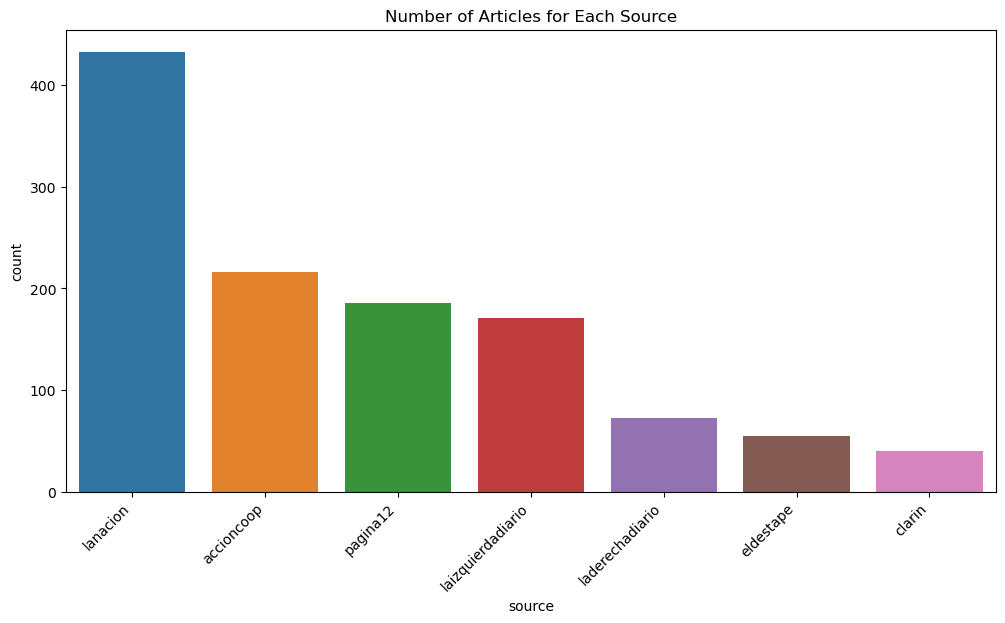

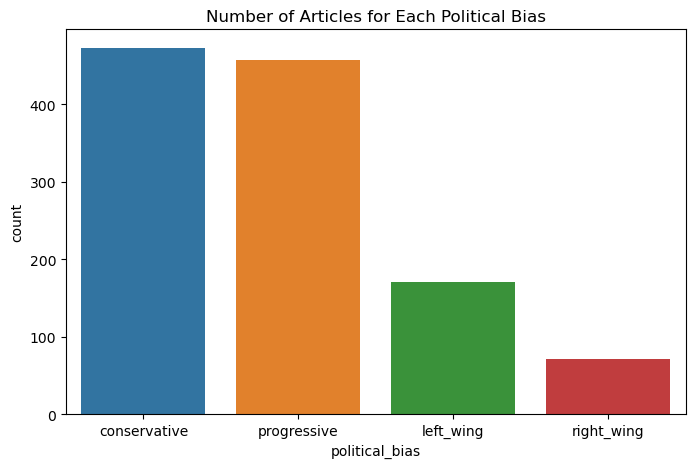

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the existing DataFrame from the CSV file
try:
    dataset = pd.read_csv('dataset.csv')
except FileNotFoundError:
    print("The dataset.csv file does not exist.")
    exit()

# Visualize the size for each source
plt.figure(figsize=(12, 6))
sns.countplot(x='source', data=dataset, order=dataset['source'].value_counts().index)
plt.title('Number of Articles for Each Source')
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualize the size for each bias
plt.figure(figsize=(8, 5))
sns.countplot(x='political_bias', data=dataset, order=dataset['political_bias'].value_counts().index)
plt.title('Number of Articles for Each Political Bias')
plt.show()
